In [1]:
import numpy as np
import pandas as pd


# Importing data

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


Checking few things in the dataset

In [4]:
# number of rows and columns
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# Checking if there exists any null value or not
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
duplicate_rows = crop[crop.duplicated()].sum()
duplicate_rows

N                0
P                0
K                0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label            0
dtype: object

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

# Co-relation of the data

In [10]:
a = crop.drop('label', axis=1)
b = crop['label']

# Now x consists the columns after dropping 'label'

corr = a.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Co-relation matrix

In [11]:
import matplotlib.pyplot as plt

<Axes: >

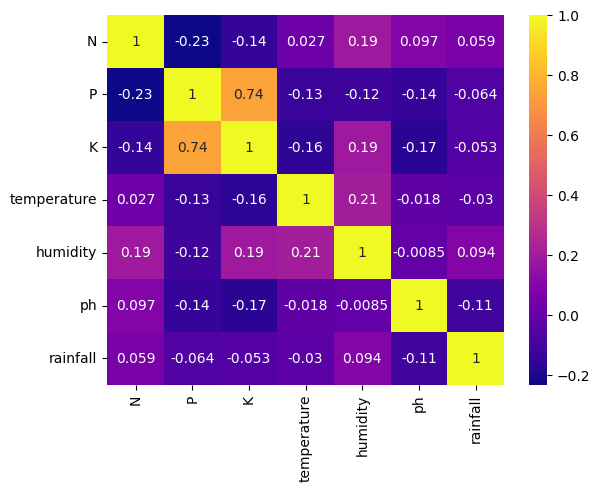

In [13]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar=True, cmap='plasma')

# Histogram plot of individual input parameters counts

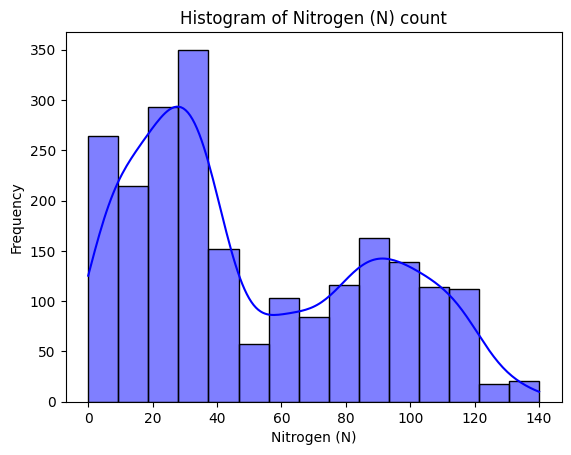

In [14]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='N', bins=15, kde=True, color='blue')

# Add title and labels
plt.title("Histogram of Nitrogen (N) count")
plt.xlabel("Nitrogen (N)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

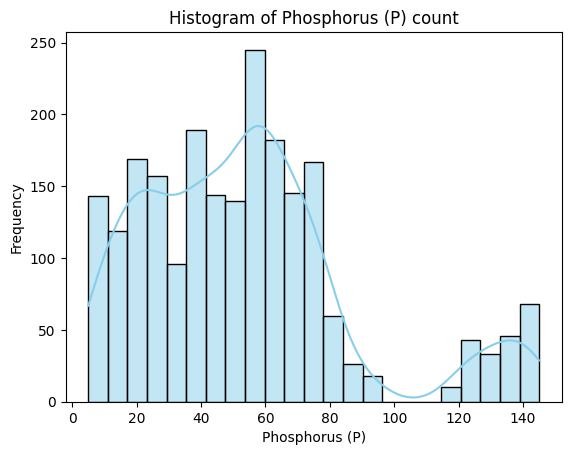

In [15]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='P', bins='auto', kde=True, color='skyblue')

# Add title and labels
plt.title("Histogram of Phosphorus (P) count")
plt.xlabel("Phosphorus (P)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

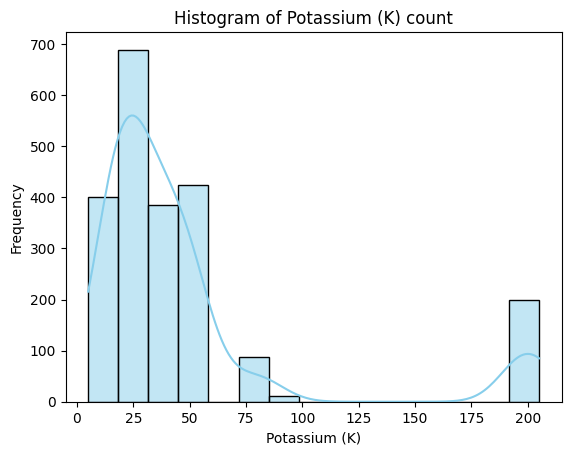

In [16]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='K', bins=15, kde=True, color='skyblue')

# Add title and labels
plt.title("Histogram of Potassium (K) count")
plt.xlabel("Potassium (K)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

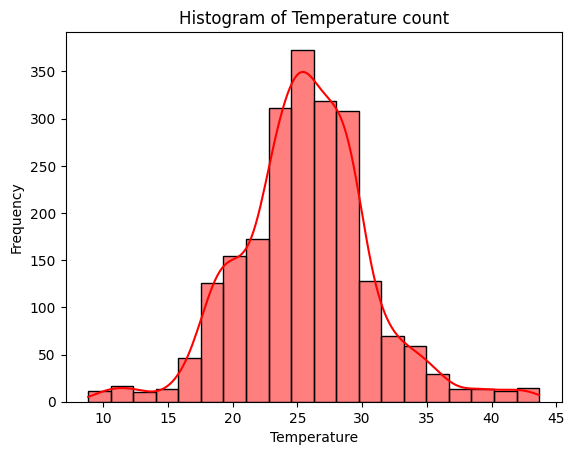

In [17]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='temperature', bins=20, kde=True, color='red')

# Add title and labels
plt.title("Histogram of Temperature count")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Show the plot
plt.show()

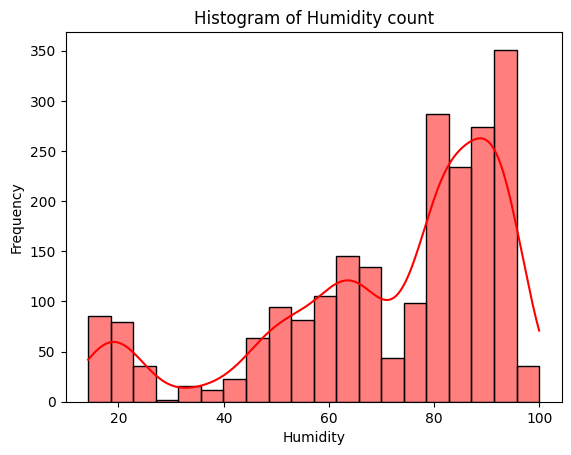

In [18]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='humidity', bins=20, kde=True, color='red')

# Add title and labels
plt.title("Histogram of Humidity count")
plt.xlabel("Humidity")
plt.ylabel("Frequency")

# Show the plot
plt.show()

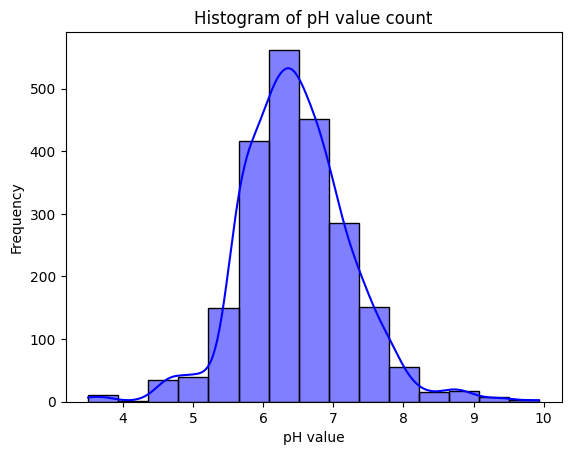

In [19]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='ph', bins=15, kde=True, color='blue')

# Add title and labels
plt.title("Histogram of pH value count")
plt.xlabel("pH value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

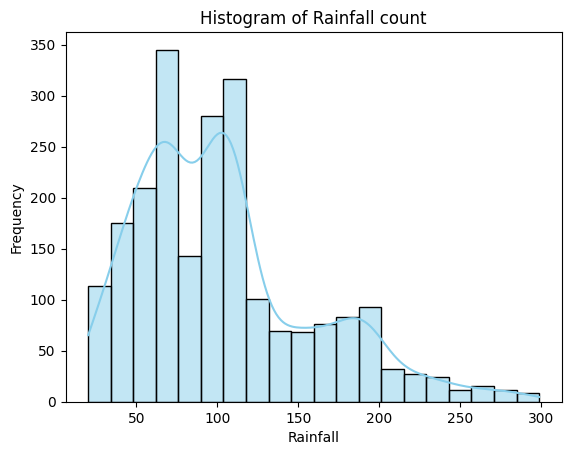

In [20]:
# Plot a histogram using seaborn histplot
sns.histplot(data=crop, x='rainfall', bins=20, kde=True, color='skyblue')

# Add title and labels
plt.title("Histogram of Rainfall count")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### Encoding of the crops name (representing by numerical values)

In [21]:
crop_encode = {
    'rice' : 1,
    'maize' : 2,
    'jute' : 3,
    'cotton' : 4,
    'coconut' : 5,
    'papaya' : 6,
    'orange' : 7,
    'apple' : 8,
    'muskmelon' : 9,
    'watermelon' : 10,
    'grapes' : 11,
    'mango' : 12,
    'banana' : 13,
    'pomegranate' : 14,
    'lentil' : 15,
    'blackgram' : 16,
    'mungbean' : 17,
    'mothbeans' : 18,
    'pigeonpeas' : 19,
    'kidneybeans' : 20,
    'chickpea' : 21,
    'coffee' : 22
}

crop['crop_num'] = crop['label'].map(crop_encode)

In [22]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

#### Now the crop names are changed into numerical values

In [23]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [24]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   crop_num     2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


# Train Test splitting of data

Partition of the columns of the dataset into two parts x and y

In [25]:
x = crop.drop(['crop_num','label'], axis=1)
y = crop['crop_num']

In [26]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [28]:
x.shape

(2200, 7)

In [29]:
y.shape

(2200,)

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
x_train.to_csv('training_data.csv', index = False)
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [32]:
x_train.shape

(1760, 7)

In [33]:
x_test.to_csv('testing_data.csv', index = False)
x_test.head()

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465


In [34]:
x_test.shape

(440, 7)

In [35]:
x_train = np.array(x_train)
x_train

array([[ 17.        ,  16.        ,  14.        , ...,  92.18151927,
          6.62553865, 102.944161  ],
       [ 37.        ,  79.        ,  19.        , ...,  69.3478631 ,
          7.14394276,  69.40878198],
       [  7.        ,  73.        ,  25.        , ...,  63.13215259,
          7.28805662,  45.20841071],
       ...,
       [ 11.        ,  36.        ,  31.        , ...,  51.77965917,
          6.47544932, 100.2585673 ],
       [ 11.        , 124.        , 204.        , ...,  80.06633966,
          6.36114111,  71.40043037],
       [ 32.        ,  78.        ,  22.        , ...,  62.35557553,
          7.00703752,  53.40906048]])

In [36]:
y_train

1656     7
752     16
892     15
1041    13
1179    12
        ..
1638     7
1095    13
1130    12
1294    11
860     15
Name: crop_num, Length: 1760, dtype: int64

In [37]:
x_test = np.array(x_test)
x_test

array([[101.        ,  17.        ,  47.        , ...,  94.72981338,
          6.18505323,  26.30820876],
       [ 98.        ,   8.        ,  51.        , ...,  86.52258079,
          6.25933595,  49.43050977],
       [ 59.        ,  62.        ,  49.        , ...,  93.35191636,
          6.94149681, 114.778071  ],
       ...,
       [121.        ,  47.        ,  16.        , ...,  79.29573149,
          7.72324015,  72.49800885],
       [116.        ,  52.        ,  19.        , ...,  75.37170612,
          6.11452588,  67.08022574],
       [  5.        ,  68.        ,  20.        , ...,  33.10695144,
          6.12166671, 155.3705624 ]])

In [38]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

# Model Training

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [40]:

def conf_matrix(y_actual, y_pred, model_name):
    model_name = model_name
    # Calculate confusion matrix
    matrix = confusion_matrix(y_actual, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix,
                annot=True,
                fmt='.0f',
                annot_kws={'fontsize': 8},
                xticklabels=True,
                yticklabels=True)
    plt.tight_layout()
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

/home/subhajit/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction over test set using LogisticRegression model
Using LogisticRegression model, accuracy over test data is 0.9454545454545454 
The confusion matrix using - LogisticRegression is given below


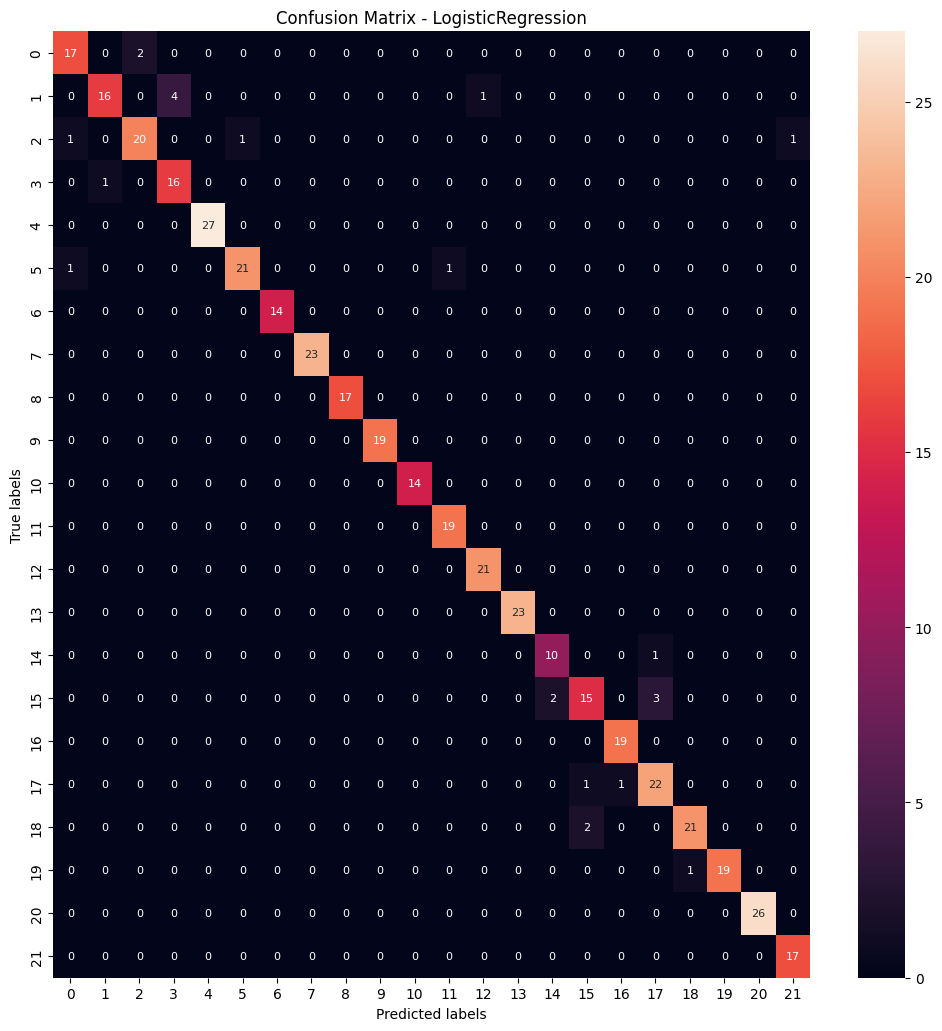

Done for LogisticRegression model
------------------------------------------------------------------------------------------
Prediction over test set using DecisionTreeClassifier model
Using DecisionTreeClassifier model, accuracy over test data is 0.9818181818181818 
The confusion matrix using - DecisionTreeClassifier is given below


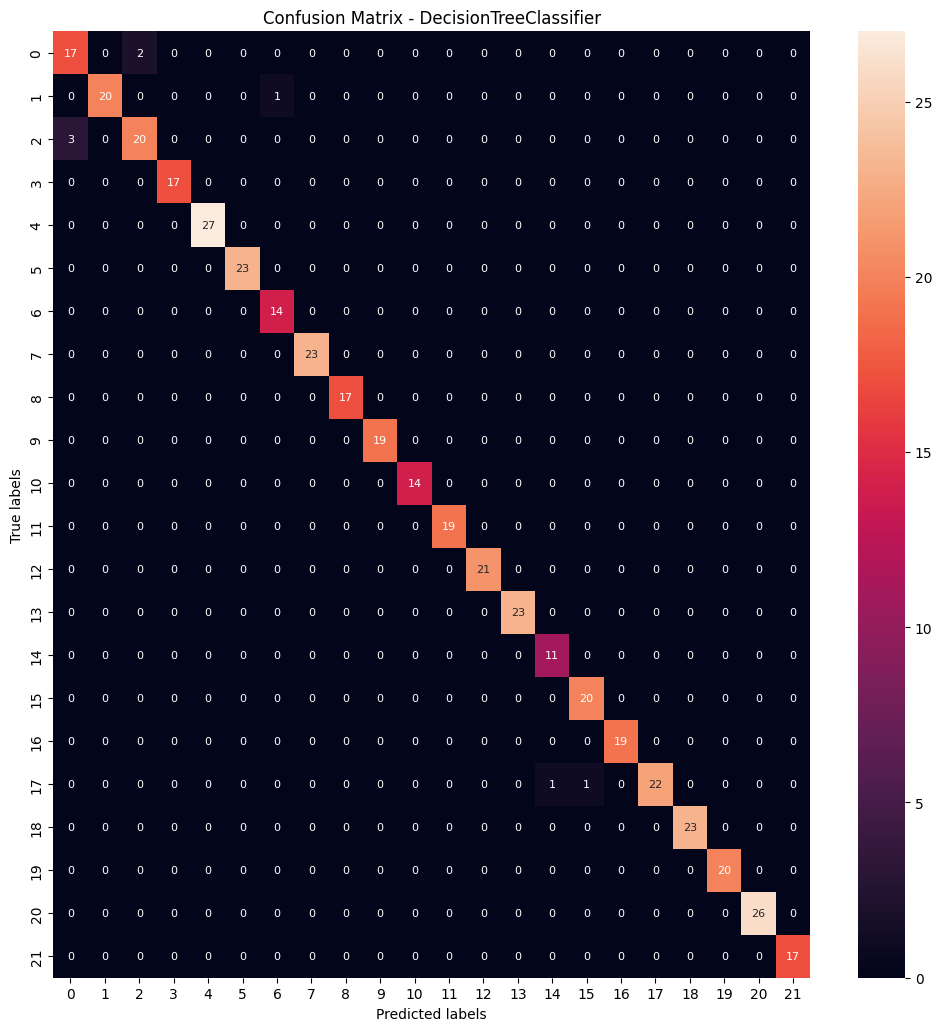

Done for DecisionTreeClassifier model
------------------------------------------------------------------------------------------
Prediction over test set using RandomForestClassifier model
Using RandomForestClassifier model, accuracy over test data is 0.9931818181818182 
The confusion matrix using - RandomForestClassifier is given below


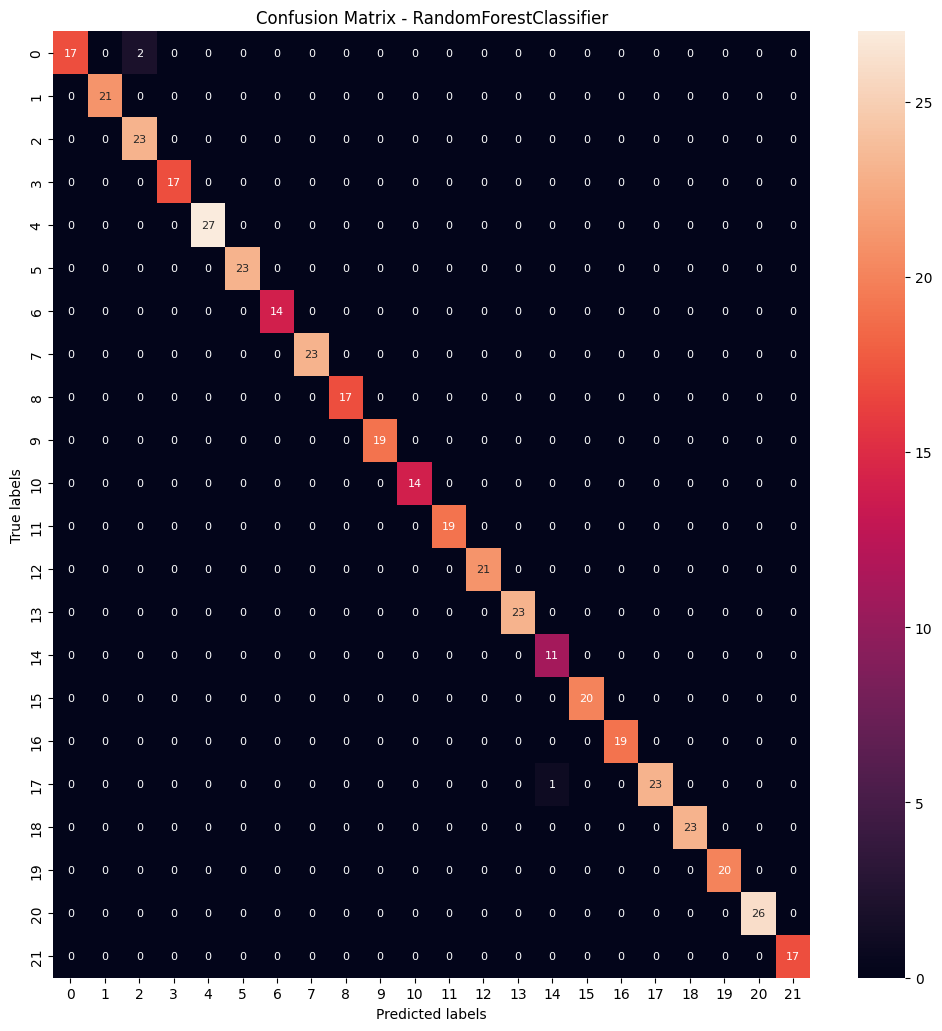

Done for RandomForestClassifier model
------------------------------------------------------------------------------------------
Prediction over test set using GradientBoostingClassifier model
Using GradientBoostingClassifier model, accuracy over test data is 0.9818181818181818 
The confusion matrix using - GradientBoostingClassifier is given below


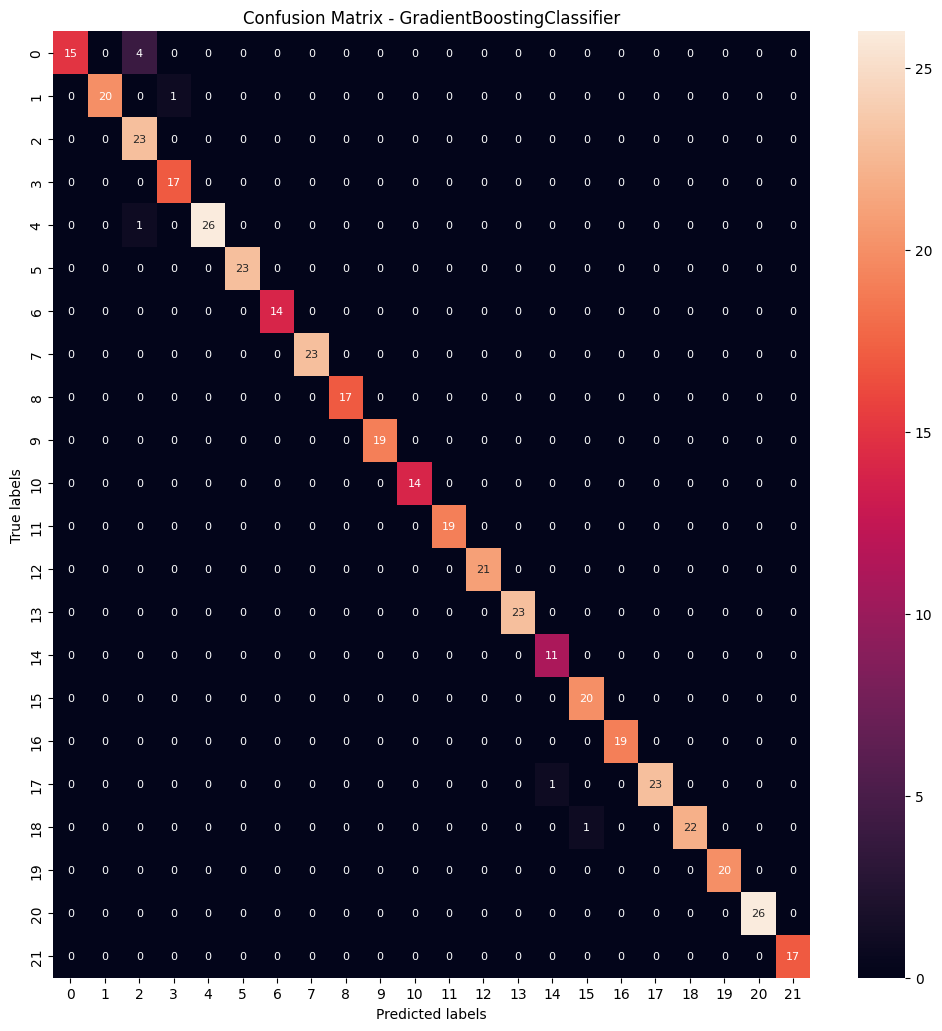

Done for GradientBoostingClassifier model
------------------------------------------------------------------------------------------
Prediction over test set using SupportVectorMachine model
Using SupportVectorMachine model, accuracy over test data is 0.9613636363636363 
The confusion matrix using - SupportVectorMachine is given below


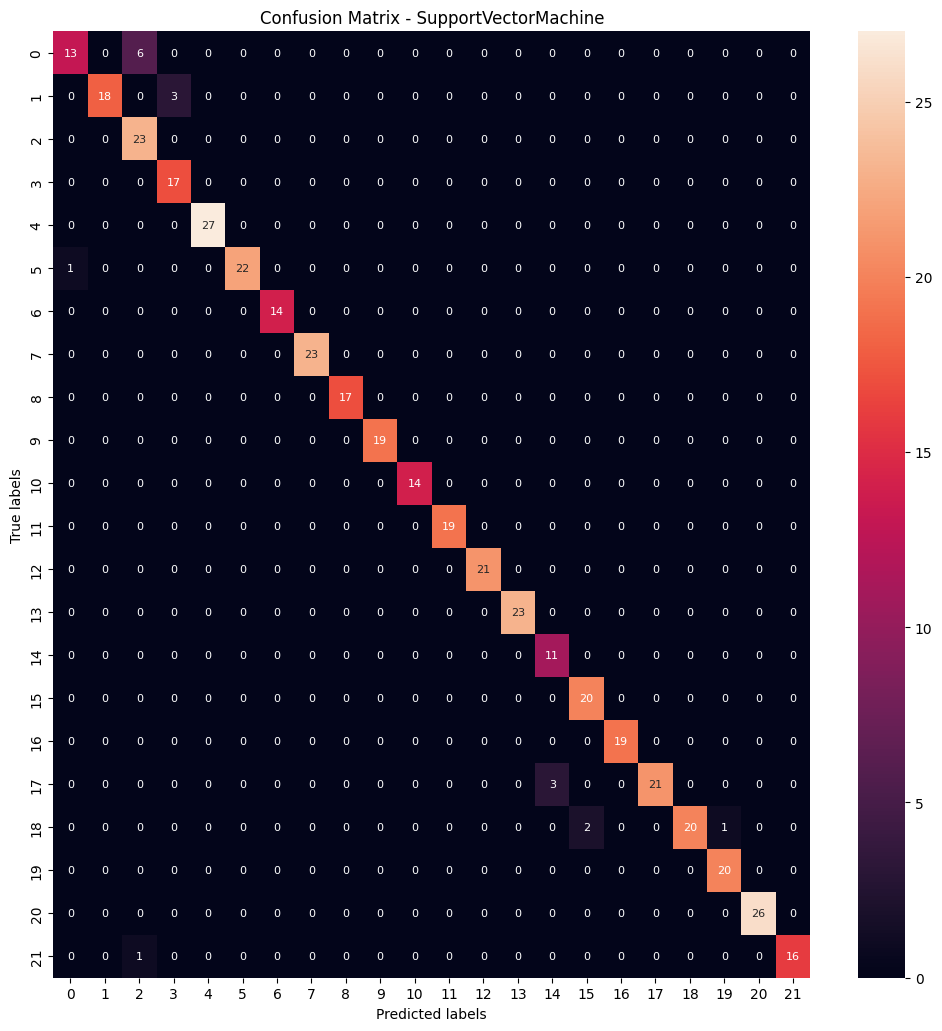

Done for SupportVectorMachine model
------------------------------------------------------------------------------------------
Prediction over test set using KNeighborsClassifier model
Using KNeighborsClassifier model, accuracy over test data is 0.9704545454545455 
The confusion matrix using - KNeighborsClassifier is given below


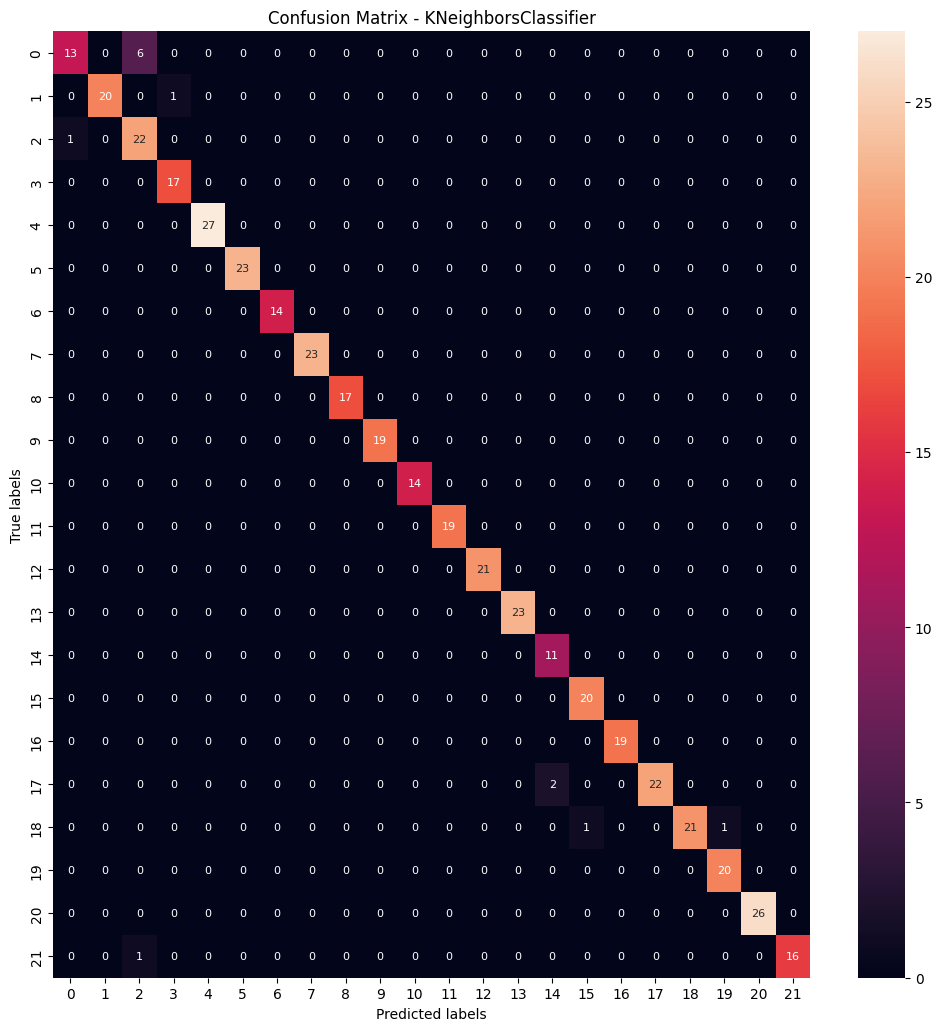

Done for KNeighborsClassifier model
------------------------------------------------------------------------------------------
{'LogisticRegression': LogisticRegression(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier(), 'SupportVectorMachine': SVC(), 'KNeighborsClassifier': KNeighborsClassifier()}
{'LogisticRegression': 0.9454545454545454, 'DecisionTreeClassifier': 0.9818181818181818, 'RandomForestClassifier': 0.9931818181818182, 'GradientBoostingClassifier': 0.9818181818181818, 'SupportVectorMachine': 0.9613636363636363, 'KNeighborsClassifier': 0.9704545454545455}


In [41]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'SupportVectorMachine' : SVC(),
    'KNeighborsClassifier' : KNeighborsClassifier()
}

model_store = {}
result_accuracy = {}
for name, md in models.items():
    md.fit(x_train, y_train)
    train_model = md
    model_store[name] = train_model
    ypred = md.predict(x_test)
    
    print(f"Prediction over test set using {name} model")
    print(f"Using {name} model, accuracy over test data is {accuracy_score(y_test, ypred)} ")
    
    result_accuracy[name] = accuracy_score(y_test, ypred)
    
    print(f"The confusion matrix using - {name} is given below")
    model_picture = conf_matrix(y_test, ypred, name)

    print(f"Done for {name} model")
    print("------------------"*5)
    
print(model_store)
print(result_accuracy)

In [42]:
model_store

{'LogisticRegression': LogisticRegression(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'SupportVectorMachine': SVC(),
 'KNeighborsClassifier': KNeighborsClassifier()}

In [43]:
result_accuracy

{'LogisticRegression': 0.9454545454545454,
 'DecisionTreeClassifier': 0.9818181818181818,
 'RandomForestClassifier': 0.9931818181818182,
 'GradientBoostingClassifier': 0.9818181818181818,
 'SupportVectorMachine': 0.9613636363636363,
 'KNeighborsClassifier': 0.9704545454545455}

In [44]:
best_model = model_store['RandomForestClassifier']
best_model

RandomForestClassifier()

We have been selected RandomForestClassifier for our classification

In [45]:
# accuracy of RandomForestClassifier

ypred = best_model.predict(x_test)
print(ypred)
accuracy_score(y_test, ypred)

[ 9 10  6  6  8 12  8 18 17 15 16  5 14  3  5 14  8  2  6  9 22  6  7  6
 21  3 17  7 19  1 14 18  3 15  3 16  3 21 21 20  6 12 16  2 17  2 19  5
  9  2 16 22 11 17 22 20  4  8 13 16 10  5 15  7  6 19  7  1  9 19  9  5
  3 13 16  6 13  4 10  7 22 21  1 18  7 12 22 18 16 14  2 18  4  6 19 18
 20 22 16 15  5  1  7  9 10 20 10 13 19 18 13  3  4 14 19 21  2  5 14  1
 19 11 16  5 21 16  5  2 13 18 13 20 14 21  5  7 19 13 13  8 20  9 17 18
  5  2  8  5 20 18 17 15 10 17 19 19 19 20  2  3 21  8  7  4  1  5 11 15
 10 11 11 16 14 21  5  2 15 11 10  3 22 22 20  3 18 20 13 20  5  6  6 17
 12 14 10 20  2  8 16 21 11 11 13  4  1 14 17 13  3 17  2 21 21 21  8  1
 20  6 22 16 20 12 12  5  6  8 21 14 21  9  8  9  9 12 12  4  5 14  1  9
 22  6 18  2 12  9 19 17 22 11  5  4 19  1  8 14 22 21  4  3 12 13  6  8
 21  1 19 18 17  3 14 11 18  3  2  5  2 21 13  3  5  3 12  9  8 13 19 16
  7 21 10 13  8 21 22 19  7  8  5  6 10 18  6 21 14 21  6 15  8 14 21 12
 21 14 10 20 17  9 10 20  9 12  3 16 21 13 16 19  6

0.9931818181818182

# Recommendation System

In [46]:
# function definition

def recommendation(N, P, K, temperature, humidity, ph, rainfall, best_model):
    input_param = np.array([[N,P,K,temperature,humidity,ph,rainfall]])     # converting to numpy array
    prediction = best_model.predict(input_param).reshape(1,-1)     # prediction variable stores the predicted crop_num
    
    return prediction[0]

In [47]:
# user input testing

N = 30
P = 137
K = 200
temperature = 22.91
humidity = 90.70
ph = 5.6
rainfall = 118.6

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall, best_model)     # predicted crop type in numerical value
predict

array([8])

### Crop decoding (numerical value to actual name conversion)

In [48]:
crop_decode = {value: key for key, value in crop_encode.items()}
print(crop_decode)

{1: 'rice', 2: 'maize', 3: 'jute', 4: 'cotton', 5: 'coconut', 6: 'papaya', 7: 'orange', 8: 'apple', 9: 'muskmelon', 10: 'watermelon', 11: 'grapes', 12: 'mango', 13: 'banana', 14: 'pomegranate', 15: 'lentil', 16: 'blackgram', 17: 'mungbean', 18: 'mothbeans', 19: 'pigeonpeas', 20: 'kidneybeans', 21: 'chickpea', 22: 'coffee'}


In [49]:
if predict[0] in crop_decode:
    crop_name = crop_decode[predict[0]]
    print("{} is the best crop to be cultivated according to these environmental factors.".format(crop_name))
    
else:
    print("Sorry! We can't recommend the particular crop based on these input factors.")

apple is the best crop to be cultivated according to these environmental factors.


Save the model for UI

In [50]:
import pickle
pickle.dump(best_model, open('classifier_model.pkl','wb'))